# Cambio de momentum lineal durante una colisión

En este código se estudiará el cambio de momentum lineal debido a una colisión. Esto se hará analizando la caída vertical de una pelota esférica que colisiona con el suelo. 



## El problema

Una pelota esférica de radio $R$ se encuentra en caída libre vertical, hasta que colisiona con el suelo. En esta colisión, el suelo ejerce una fuerza normal $\vec{N}$ de contacto sobre la pelota, vertical hacia arriba, la cual modelaremos como
$$
\vec{N} = \left\{ \begin{array}{lcc}
             k(R-y)^{3/2} \, \hat{\jmath} &   \text{si}  & y < R \\
              \vec{0} &  \text{si} & y \geq R ,           
             \end{array}
   \right.
$$
donde $y$ es la posición vertical del centro de la pelota, donde $y = 0$ corresponde al suelo, y $k$ es una constante que tiene las unidades necesarias para que $\vec{N}$ esté en Newton.

Así, y despreciando la resistencia del aire, el movimiento de la pelota se verá afectado por dos fuerzas, la fuerza de contacto $\vec{N}$ y la gravedad $\vec{F}_g$. Entonces, la fuerza neta $\vec{F}_\text{total}$ está dada por
$$
\vec{F}_\text{total} = \vec{N} + \vec{F}_\text{g} = \vec{N} +  g (-\hat{\jmath}) = \left\{ \begin{array}{lcc}
             \left( k(R-y)^{3/2} - g \right) \, \hat{\jmath} &   \text{si}  & y < R \\
              g (-\hat{\jmath})  &  \text{si} & y \geq R            
             \end{array}
   \right. .
$$


Resolveremos el problema de encontrar la posición vertical $y(t)$ de la pelota en función del tiempo, con una integración numérica simple. 

In [1]:
import numpy as np                #Se importan los módulos que usaremos 
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Se definen las condiciones iniciales de integración.

g = 9.8  # Aceleración de gravedad, en m/s^2. Acá hemos puesto sólo el módulo

h = 0.021      # Altura inicial, en metros 
M = 0.1       # Masa del cuerpo, en kg
R = 0.02       # Radio de la pelota, en metros
k = 1000000.0  # Constante de la fuerza normal
tf = 0.005     # Tiempo total de integración, en segundos
v1 = -2.8         # Velocidad vertical inicial
    
def normal(y, R, k):    # definiremos la función por tramo de la fuerza normal
    if y < R:           # El primer tramo
        N = k*(R-y)**(1.5)
    else:               # El segundo tramo
        N = 0
    return N



Ahora se realiza la integración numérica. 

Para ello, en este caso se considerará la segunda ley de Newton escrita en función del momentum lineal $\vec{p}$, esto es, 
$$
 \vec{F} = \frac{d \vec{p}}{dt}.
$$
En una dimensión, podemos escribir
$$
 F = \frac{d p}{dt}.
$$
Como ya se ha aprendido, se puede hacer uan integración numérica simple de una espresión como esta, donde su resultado es
$$
p_2 = p_1 + F \Delta t.
$$
Esta expresión será usada para actualizar el valor del momentum en la integración numérica.

In [3]:
y1 = h        # Posición inicial
p1 = v1*M     # Momentum inicial
t = 0         # Tiempo inicial en segundos

Dt = 0.00001       # Intervalo de tiempo, en segundos

y1_array = []      # Inicializamos las variables que almacenarán los resultados, en forma de arreglo, para ser graficados.
p1_array = []
t1_array = []
FN_array = []


while t < tf:   # Control del cálculo.      
    F = normal(y1, R, k) - g   # Fuerza involucrada, que corresponde sólo a la de gravedad
    FN_array.append(F)         

        #Se hace el cálculo, actualizando las variables de momentum, posición y tiempo.
    t1_array.append(t)
    p1 = p1 + F*Dt       # Actualizamos el momentum utilizando la expresión encontrada
    y1 = y1 + p1*Dt/M    # Actualizamos la posición, donde va la velocidad, ponemos momentum/masa, recordando que p = mv -> v = p/m
    t = t + Dt           # Actualizamos el tiempo
    y1_array.append(y1)   # Guardamos el resultado del eje x
    p1_array.append(p1)   # Guardamos el resultado del eje y



Graficaremos los resultados, ocupando el comando subplot de matplotlib

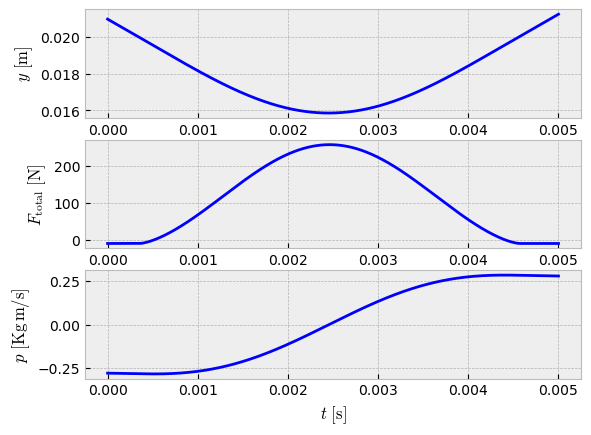

In [4]:
plt.subplot(3,1,1)
plt.plot(t1_array, y1_array, c='blue')  
plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.ylabel('$y\ \\rm [m]$') # Etiqueta del eje y
#plt.savefig('x_vs_t.png')
#plt.show()

plt.subplot(3,1,2)
plt.plot(t1_array, FN_array, c='blue') 
plt.grid(True)              
plt.ylabel('$F_{\\rm total}\ \\rm [N]$') # Etiqueta del eje y
#plt.savefig('x_vs_t.png')
#plt.show()

plt.subplot(3,1,3)
plt.plot(t1_array, p1_array, c='blue') 
plt.grid(True)             
plt.xlabel('$t\ \\rm [s]$')           # Etiqueta del eje x. Al ocupar el comando subplot, y que el eje x de los tres gráficos tengan los 
                                      # mismos datos, podemos poner una etiqueta global para los tres gráficos.
plt.ylabel('$p\ {\\rm [Kg} \, {\\rm m / s]}$') # Etiqueta del eje y
#plt.savefig('x_vs_t.png')
plt.show()

## Versión interactiva

Finalmente, se presentará una versión del código completa que funciona de manera interactiva, en el cual podemos modificar los distintos parámetros del cálculo para ver cómo varía el resultado con el cambio del valor de las variables.

In [5]:
from ipywidgets import interact    # Importamos la función interact del paquete ipywidgets
                                   

In [22]:
def graf_interact(h, k, tf, v1):
    g = 9.8  # Acá ocupamos en comando array del paquete numpy para escribir la gravedad como un vector

    M = 0.1       # Masa del cuerpo, en kg
    R = 0.02       # Radio de la pelota, en metros

    y1 = h      # Posición inicial
    p1 = v1*M   # Momentum inicial
    t = 0              # Tiempo inicial en segundos

    Dt = 0.00001          # Intervalo de tiempo, en segundos

    y1_array = []      # Inicializamos las variables que almacenarán los resultado  en forma de arreglo, para ser graficados.
    p1_array = []
    t1_array = []
    FN_array = []


    while t < tf:   # Control del cálculo. 
        F = normal(y1, R, k) - g        # Fuerza involucrada, 
        FN_array.append(F)

        #Se hace el cálculo, antualizando las variables de velocidad, posición y tiempo.
        t1_array.append(t)
        p1 = p1 + F*Dt 
        y1 = y1 + p1*Dt/M
        t = t + Dt
        y1_array.append(y1)   # Guardamos el resultado del eje x
        p1_array.append(p1)   # Guardamos el resultado del eje y

      
    plt.subplot(3,1,1)
    plt.plot(t1_array, y1_array, c='blue')  
    plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
    plt.ylabel('$y\ \\rm [m]$') # Etiqueta del eje y
    plt.ylim(0,0.56)
    #plt.savefig('x_vs_t.png')
    #plt.show()

    plt.subplot(3,1,2)
    plt.plot(t1_array, FN_array, c='blue') 
    plt.grid(True)              
    plt.ylabel('$F_{\\rm total}\ \\rm [N]$') # Etiqueta del eje y
    plt.ylim(-100,2400)
    #plt.savefig('x_vs_t.png')
    #plt.show()

    plt.subplot(3,1,3)
    plt.plot(t1_array, p1_array, c='blue') 
    plt.grid(True)             
    plt.xlabel('$t\ \\rm [s]$')           # Etiqueta del eje x. Al ocupar el comando subplot, y que el eje x de los tres gráficos tengan los 
                                        # mismos datos, podemos poner una etiqueta global para los tres gráficos.
    plt.ylabel('$p\ \\rm [Kg \, m / s]$') # Etiqueta del eje y
    plt.ylim(-1.1,1.1)
    #plt.savefig('x_vs_t.png')
    plt.show()

In [23]:
interact(graf_interact, h=(0.02, 0.5, 0.02), k=(500000,5000000, 500000), tf=( 0.005,  1,  0.005), v1=(-3,0, 0.1))

interactive(children=(FloatSlider(value=0.26, description='h', max=0.5, min=0.02, step=0.02), IntSlider(value=…

<function __main__.graf_interact(h, k, tf, v1)>